In [35]:

import seaborn as sns
import csv
import matplotlib.pyplot as plt
import pandas as pd
import re

          link1       link2
0     74.334759  102.598312
1     74.324085  102.606317
2     74.313411  102.614323
3     74.302736  102.622995
4     74.292730  102.630334
...         ...         ...
3994  76.338812   87.689264
3995  76.337477   87.655240
3996  76.336143   87.622151
3997  76.334142   87.590062
3998  76.334142   87.557506

[3999 rows x 2 columns]


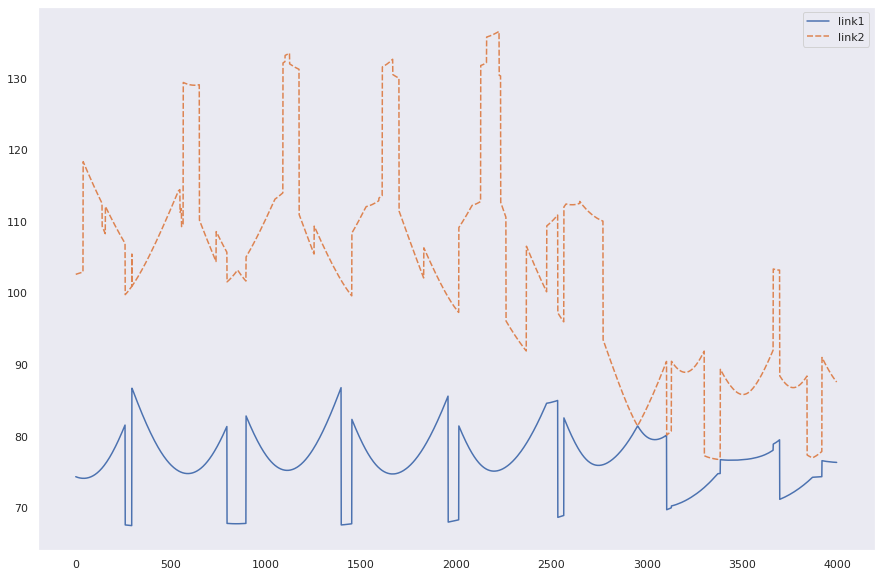

In [42]:
%matplotlib inline
# load rtt csv
# with open('rtt.csv','r') as f:
#     data = csv.reader(f)
#     rtt1 = []
#     rtt2 = []
#     for row in data:
#         rtt1.append(row[0])
#         rtt2.append(row[1])

data = pd.read_csv('rtt.csv')
data.columns=['link1','link2']

def paint(data):
    plt.figure(figsize=(15, 10))
    sns.set_theme(style="dark")
    sns.lineplot(data=data)
print(data)
paint(data)

     0-1_not  0-1_have
0       73.5      76.1
1       75.8      73.9
2       74.2      74.4
3       74.2      74.7
4       73.1      74.3
..       ...       ...
995     83.6      76.2
996     84.0      77.3
997     83.6      39.0
998     83.9      77.2
999     84.3      77.6

[1000 rows x 2 columns]


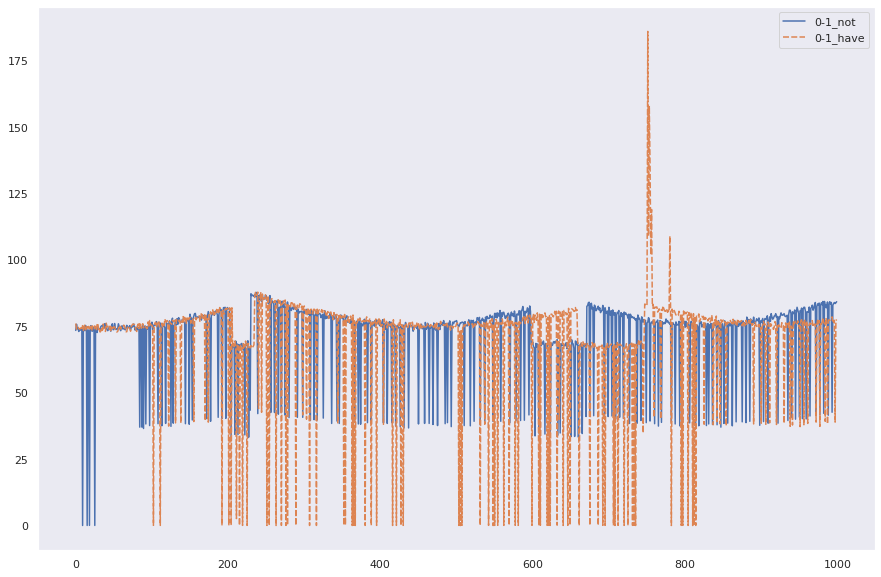

In [46]:
def get_rtt_from_log(filename):
    with open(filename,'r') as f:
        pattern = re.compile(u'时间=(.*?) 毫秒', re.S)
        result_list = pattern.findall(f.read())
        return [float(i) for i in result_list]

def get_data(filestring):
    not_rtt_list = get_rtt_from_log(f'./not/pinglog{filestring}.log')
    pd_not = pd.DataFrame(not_rtt_list,columns=[f'{filestring}_not'])
    have_rtt_list = get_rtt_from_log(f'./have/pinglog{filestring}.log')
    pd_have = pd.DataFrame(have_rtt_list,columns=[f'{filestring}_have'])
    pd_all = pd.concat([pd_not,pd_have], axis=1)
    return pd_all[:1000]

pd_data = get_data('0-1')
print(pd_data)
paint(pd_data)

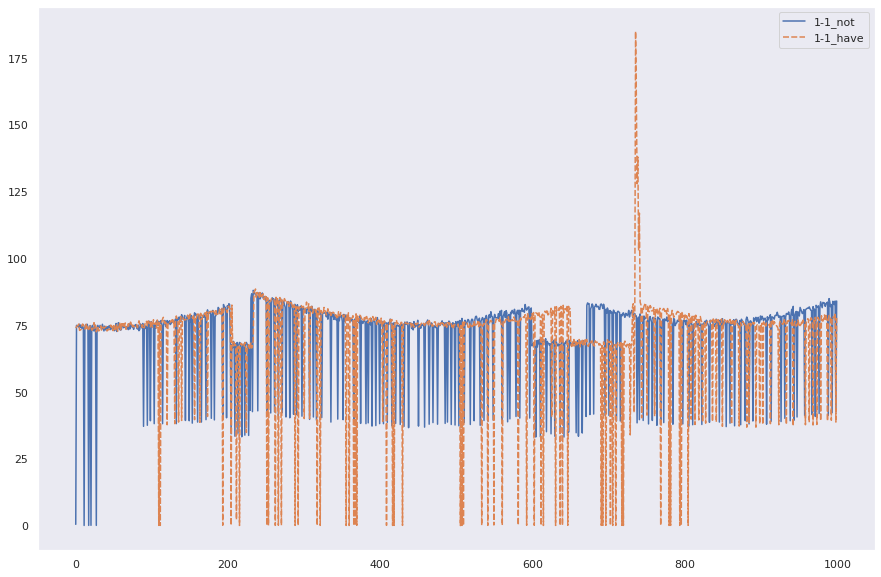

In [48]:
pd_data = get_data('1-1')
# print(pd_data)
paint(pd_data)

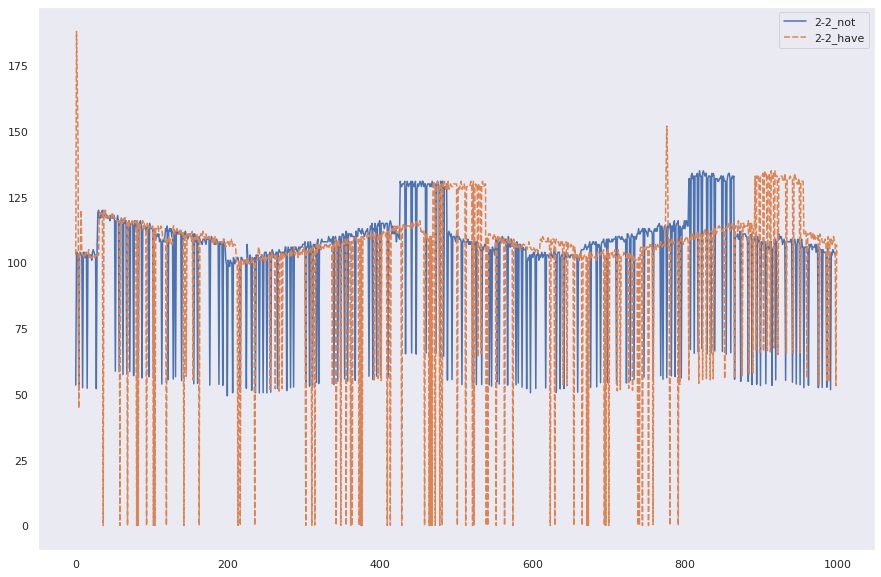

In [49]:
pd_data = get_data('2-2')
# print(pd_data)
paint(pd_data)